## Sun God Environment

/Users/edeno/Documents/GitHub/non_local_detector/src/non_local_detector/likelihoods/clusterless_kde.py:54: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


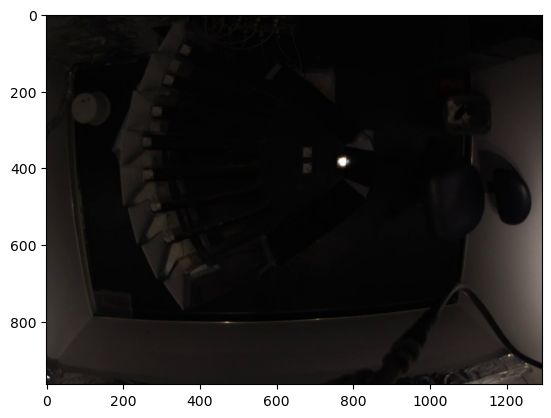

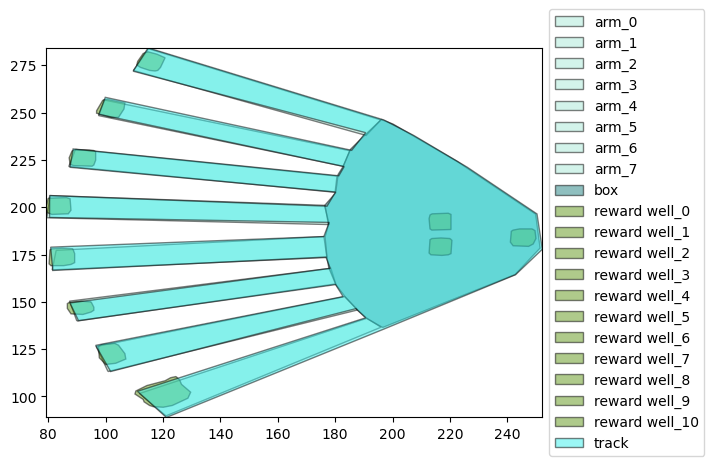

In [1]:
import matplotlib.pyplot as plt
from non_local_detector.environment.regions import (
    load_cvat_xml,
)
from non_local_detector.environment.transforms import scale_2d, flip_y
from non_local_detector.environment.regions.plot import plot_regions

CM_PER_PIXEL = 1 / 3.14
frame_size_px = (1292, 964)  # width, height in pixels
T = scale_2d(CM_PER_PIXEL) @ flip_y(frame_height_px=frame_size_px[1])

img_path = "/Users/edeno/Downloads/frame0.jpg"

sungod_regions = load_cvat_xml(
    xml_path="/Users/edeno/Downloads/sungod_annotation.xml", pixel_to_world=T
)
fig, ax = plt.subplots()
ax.imshow(plt.imread(img_path))

fig, ax = plt.subplots()
plot_regions(sungod_regions, ax=ax, add_legend=True)

In [2]:
sungod_regions.to_dataframe()

name     kind  \
0            arm_0  polygon   
1            arm_1  polygon   
2            arm_2  polygon   
3            arm_3  polygon   
4            arm_4  polygon   
5            arm_5  polygon   
6            arm_6  polygon   
7            arm_7  polygon   
8              box  polygon   
9    reward well_0  polygon   
10   reward well_1  polygon   
11   reward well_2  polygon   
12   reward well_3  polygon   
13   reward well_4  polygon   
14   reward well_5  polygon   
15   reward well_6  polygon   
16   reward well_7  polygon   
17   reward well_8  polygon   
18   reward well_9  polygon   
19  reward well_10  polygon   
20           track  polygon   

                                                 geom  \
0   {'type': 'Polygon', 'coordinates': (((111.7770...   
1   {'type': 'Polygon', 'coordinates': (((100.8057...   
2   {'type': 'Polygon', 'coordinates': (((89.95222...   
3   {'type': 'Polygon', 'coordinates': (((82.71656...   
4   {'type': 'Polygon', 'coordinates': (((177.9745...   
5   {'type': 'Polygon', 'coordinates': (((89.42993...   
6   {'type': 'Polygon', 'coordinates': (((97.49999...   
7   {'type': 'Polygon', 'coordinates': (((109.6592...   
8   {'type': 'Polygon', 'coordinates': (((196.5573...   
9   {'type': 'Polygon', 'coordinates': (((220.0636...   
10  {'type': 'Polygon', 'coordinates': (((213.6942...   
11  {'type': 'Polygon', 'coordinates': (((88.85350...   
12  {'type': 'Polygon', 'coordinates': (((94.90445...   
13  {'type': 'Polygon', 'coordinates': (((114.6496...   
14  {'type': 'Polygon', 'coordinates': (((103.1847...   
15  {'type': 'Polygon', 'coordinates': (((124.5222...   
16  {'type': 'Polygon', 'coordinates': (((79.93630...   
17  {'type': 'Polygon', 'coordinates': (((99.04458...   
18  {'type': 'Polygon', 'coordinates': (((248.7261...   
19  {'type': 'Polygon', 'coordinates': (((88.53503...   
20  {'type': 'Polygon', 'coordinates': (((196.9554...   

                                             metadata          area  
0   {'source_xml': 'sungod_annotation.xml', 'color...    946.266973  
1   {'source_xml': 'sungod_annotation.xml', 'color...   1009.080571  
2   {'source_xml': 'sungod_annotation.xml', 'color...    891.318715  
3   {'source_xml': 'sungod_annotation.xml', 'color...   1008.811296  
4   {'source_xml': 'sungod_annotation.xml', 'color...   1060.549911  
5   {'source_xml': 'sungod_annotation.xml', 'color...    829.529139  
6   {'source_xml': 'sungod_annotation.xml', 'color...    760.791067  
7   {'source_xml': 'sungod_annotation.xml', 'color...    985.614858  
8   {'source_xml': 'sungod_annotation.xml', 'color...   5285.529880  
9   {'source_xml': 'sungod_annotation.xml', 'color...     66.686275  
10  {'source_xml': 'sungod_annotation.xml', 'color...     63.592844  
11  {'source_xml': 'sungod_annotation.xml', 'color...     72.163171  
12  {'source_xml': 'sungod_annotation.xml', 'color...     54.160412  
13  {'source_xml': 'sungod_annotation.xml', 'color...     68.309059  
14  {'source_xml': 'sungod_annotation.xml', 'color...     80.530650  
15  {'source_xml': 'sungod_annotation.xml', 'color...    195.291898  
16  {'source_xml': 'sungod_annotation.xml', 'color...     68.816179  
17  {'source_xml': 'sungod_annotation.xml', 'color...     69.323299  
18  {'source_xml': 'sungod_annotation.xml', 'color...     72.619579  
19  {'source_xml': 'sungod_annotation.xml', 'color...     75.763723  
20  {'source_xml': 'sungod_annotation.xml', 'color...  13079.625842

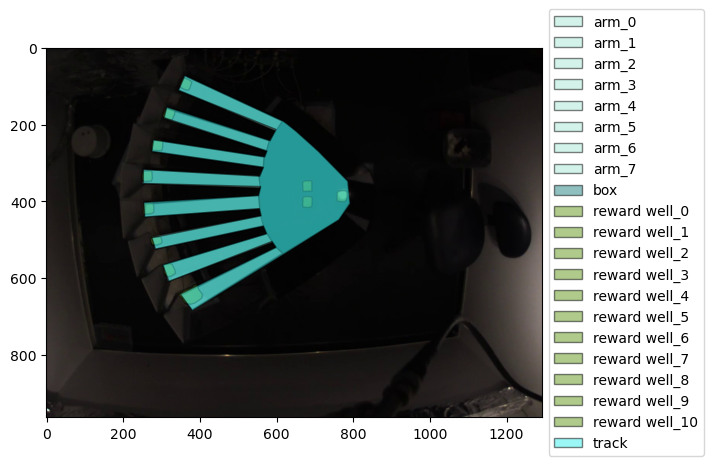

In [3]:
fig, ax = plt.subplots()
ax.imshow(plt.imread(img_path))
plot_regions(sungod_regions, ax=ax, add_legend=True, world_to_pixel=T.inverse())

In [4]:
from non_local_detector.environment import (
    Environment,
    list_available_layouts,
    get_layout_parameters,
)

list_available_layouts()

['Graph',
 'Hexagonal',
 'ImageMask',
 'MaskedGrid',
 'RegularGrid',
 'ShapelyPolygon',
 'TriangularMesh']

In [5]:
get_layout_parameters("TriangularMesh")

{'boundary_polygon': {'annotation': 'Polygon',
  'default': None,
  'kind': 'positional or keyword'},
 'point_spacing': {'annotation': 'float',
  'default': None,
  'kind': 'positional or keyword'}}

<Axes: title={'center': 'TriangularMesh'}, xlabel='X coordinate', ylabel='Y coordinate'>

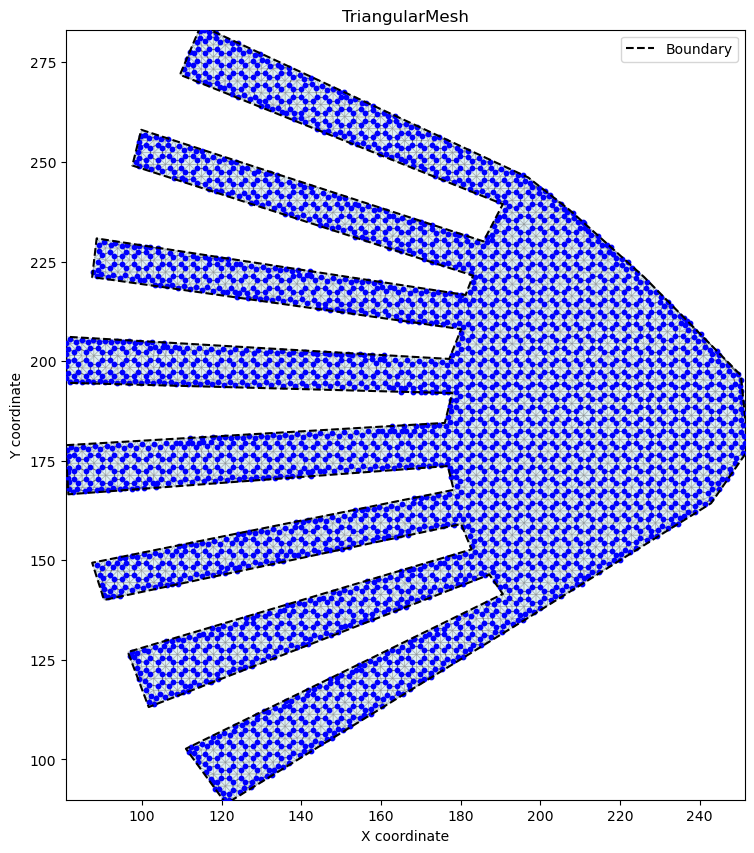

In [6]:
sungod_env = Environment.from_layout(
    kind="TriangularMesh",
    layout_params={"boundary_polygon": sungod_regions["track"].data, "point_spacing": 3.0},
    regions=sungod_regions,
)

fig, ax = plt.subplots(figsize=(10, 10))
sungod_env.plot(ax=ax)

<Axes: title={'center': 'TriangularMesh'}, xlabel='X coordinate', ylabel='Y coordinate'>

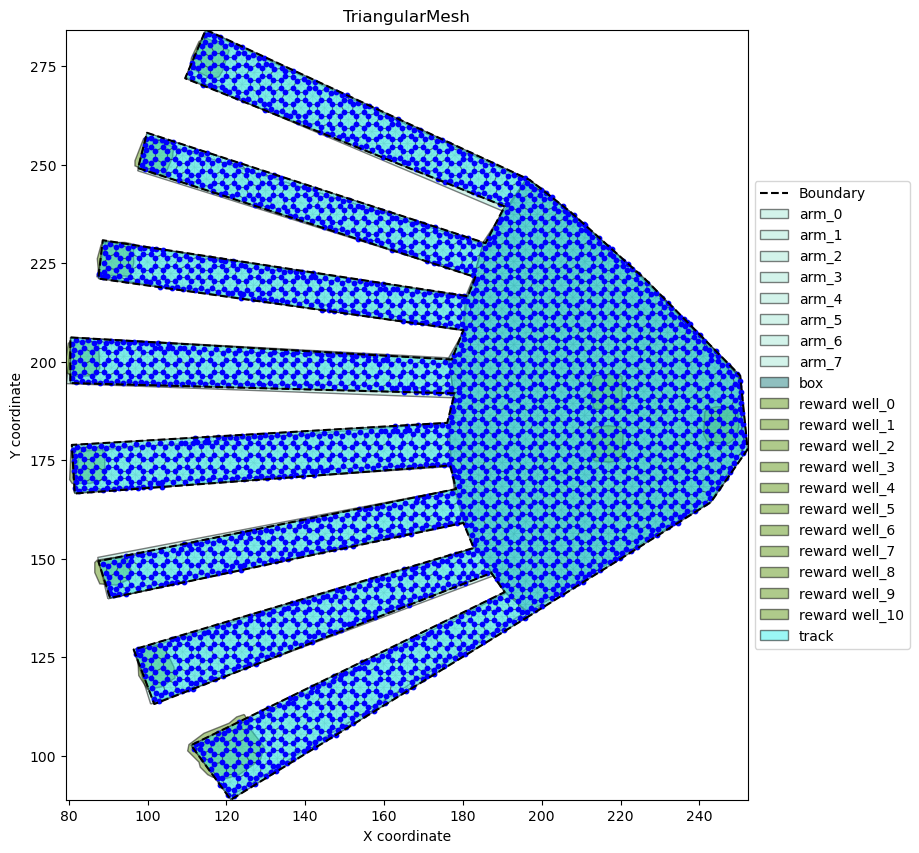

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
sungod_env.plot(ax=ax, show_regions=True)

## Hex Maze Environment

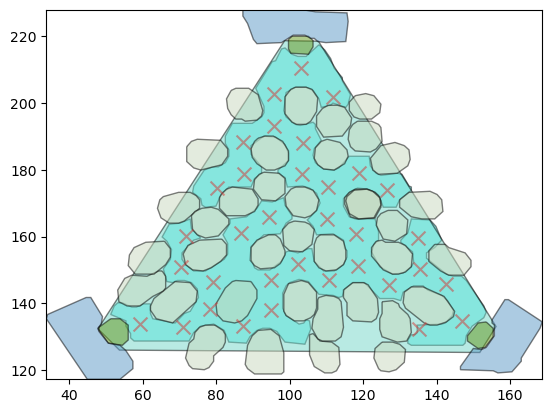

In [8]:
from non_local_detector.environment.regions.plot import plot_regions


CM_PER_PIXEL = 1 / 3.14
frame_size_px = (1280, 720)  # width, height in pixels
T = scale_2d(CM_PER_PIXEL) @ flip_y(frame_height_px=frame_size_px[1])

hex_maze_regions = load_cvat_xml(
    xml_path="/Users/edeno/Downloads/hex_maze_annotation.xml", pixel_to_world=T
)


fig, ax = plt.subplots()

plot_regions(hex_maze_regions, ax=ax, add_legend=False)

In [9]:
hex_maze_regions.to_dataframe()

name     kind  \
0            track  polygon   
1            arena  polygon   
2        barrier_0  polygon   
3        barrier_1  polygon   
4        barrier_2  polygon   
..             ...      ...   
74  hex centers_29    point   
75  hex centers_30    point   
76  hex centers_31    point   
77  hex centers_32    point   
78  hex centers_33    point   

                                                 geom  \
0   {'type': 'Polygon', 'coordinates': (((107.9617...   
1   {'type': 'Polygon', 'coordinates': (((47.80254...   
2   {'type': 'Polygon', 'coordinates': (((101.2738...   
3   {'type': 'Polygon', 'coordinates': (((91.40127...   
4   {'type': 'Polygon', 'coordinates': (((84.07643...   
..                                                ...   
74            [87.38535031847132, 133.24840764331208]   
75              [70.86624203821655, 132.984076433121]   
76            [78.29299363057325, 138.33439490445858]   
77            [59.16878980891719, 133.88535031847132]   
78            [146.9012738853503, 134.59554140127386]   

                                             metadata         area  
0   {'source_xml': 'hex_maze_annotation.xml', 'col...  2822.021177  
1   {'source_xml': 'hex_maze_annotation.xml', 'col...  5786.138119  
2   {'source_xml': 'hex_maze_annotation.xml', 'col...    63.491420  
3   {'source_xml': 'hex_maze_annotation.xml', 'col...    81.240618  
4   {'source_xml': 'hex_maze_annotation.xml', 'col...    76.879387  
..                                                ...          ...  
74  {'source_xml': 'hex_maze_annotation.xml', 'col...     0.000000  
75  {'source_xml': 'hex_maze_annotation.xml', 'col...     0.000000  
76  {'source_xml': 'hex_maze_annotation.xml', 'col...     0.000000  
77  {'source_xml': 'hex_maze_annotation.xml', 'col...     0.000000  
78  {'source_xml': 'hex_maze_annotation.xml', 'col...     0.000000  

[79 rows x 5 columns]

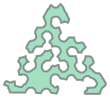

In [10]:
hex_maze_regions["track"].data

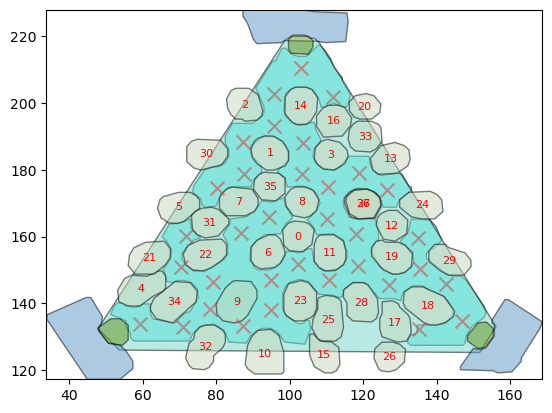

In [11]:

fig, ax = plt.subplots()
plot_regions(
    hex_maze_regions, ax=ax, add_legend=False
)
for region_name in hex_maze_regions:
    region = hex_maze_regions[region_name]
    if region.name.startswith("barrier"):

        ax.text(
            region.data.centroid.x, region.data.centroid.y,
            region.name.split("_")[-1],
            fontsize=8,
            color="red",
            ha="center",
            va="center",
        )

In [12]:
boundary_polygon = hex_maze_regions["track"].data - hex_maze_regions["barrier_9"].data
hex_maze_env = Environment.from_layout(
    kind="TriangularMesh", layout_params={"boundary_polygon": boundary_polygon, "point_spacing": 3.0},
    regions=hex_maze_regions,
)

<Axes: title={'center': 'TriangularMesh'}, xlabel='X coordinate', ylabel='Y coordinate'>

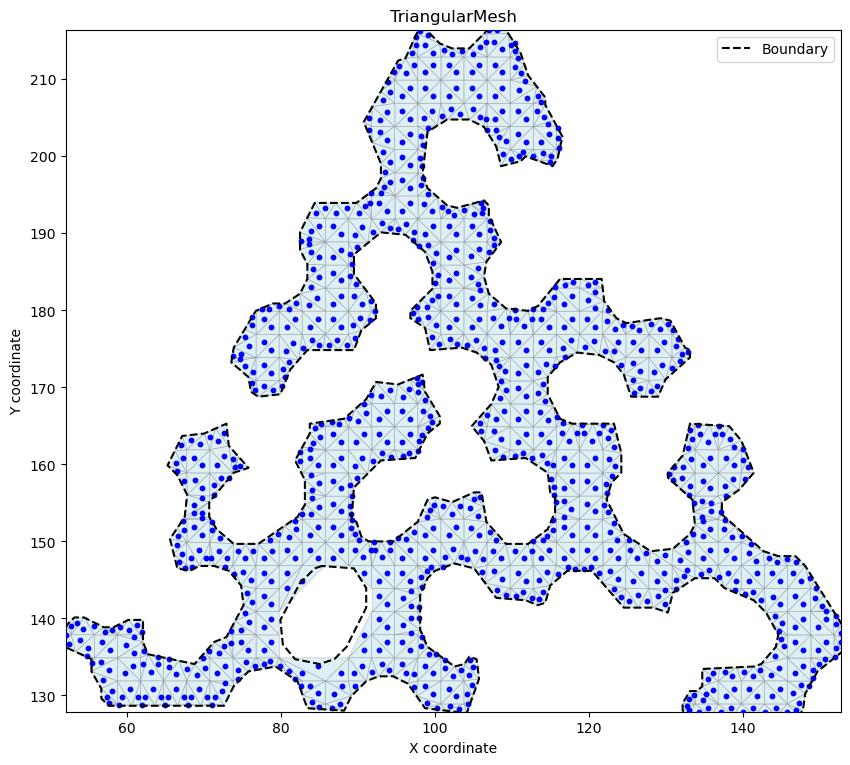

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
hex_maze_env.plot(ax=ax, show_connectivity=False)


<Axes: title={'center': 'TriangularMesh'}, xlabel='X coordinate', ylabel='Y coordinate'>

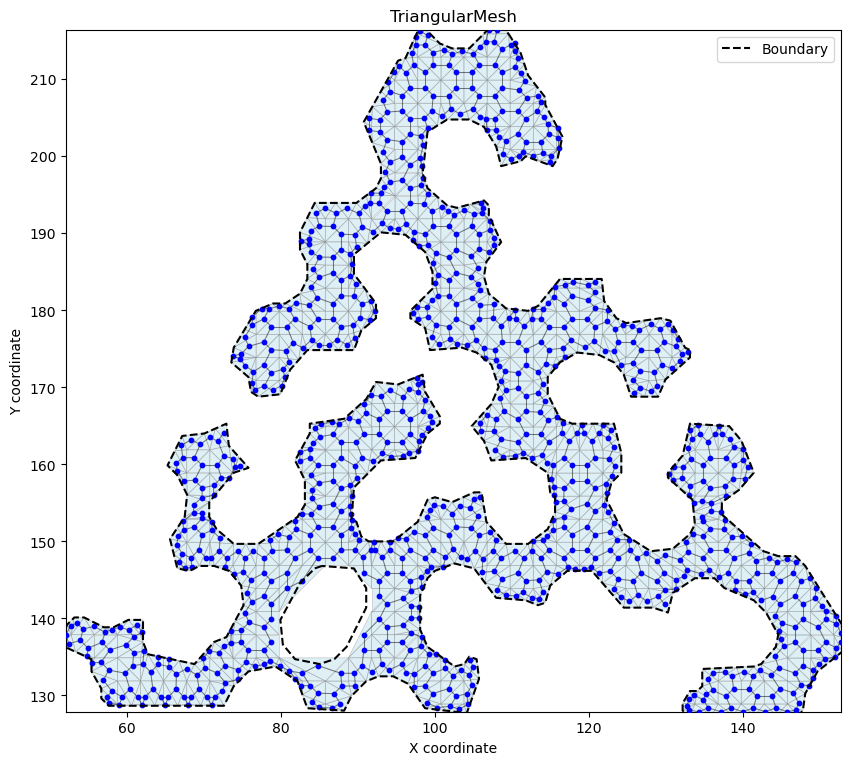

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
hex_maze_env.plot(ax=ax, show_connectivity=True)

<Axes: title={'center': 'TriangularMesh'}, xlabel='X coordinate', ylabel='Y coordinate'>

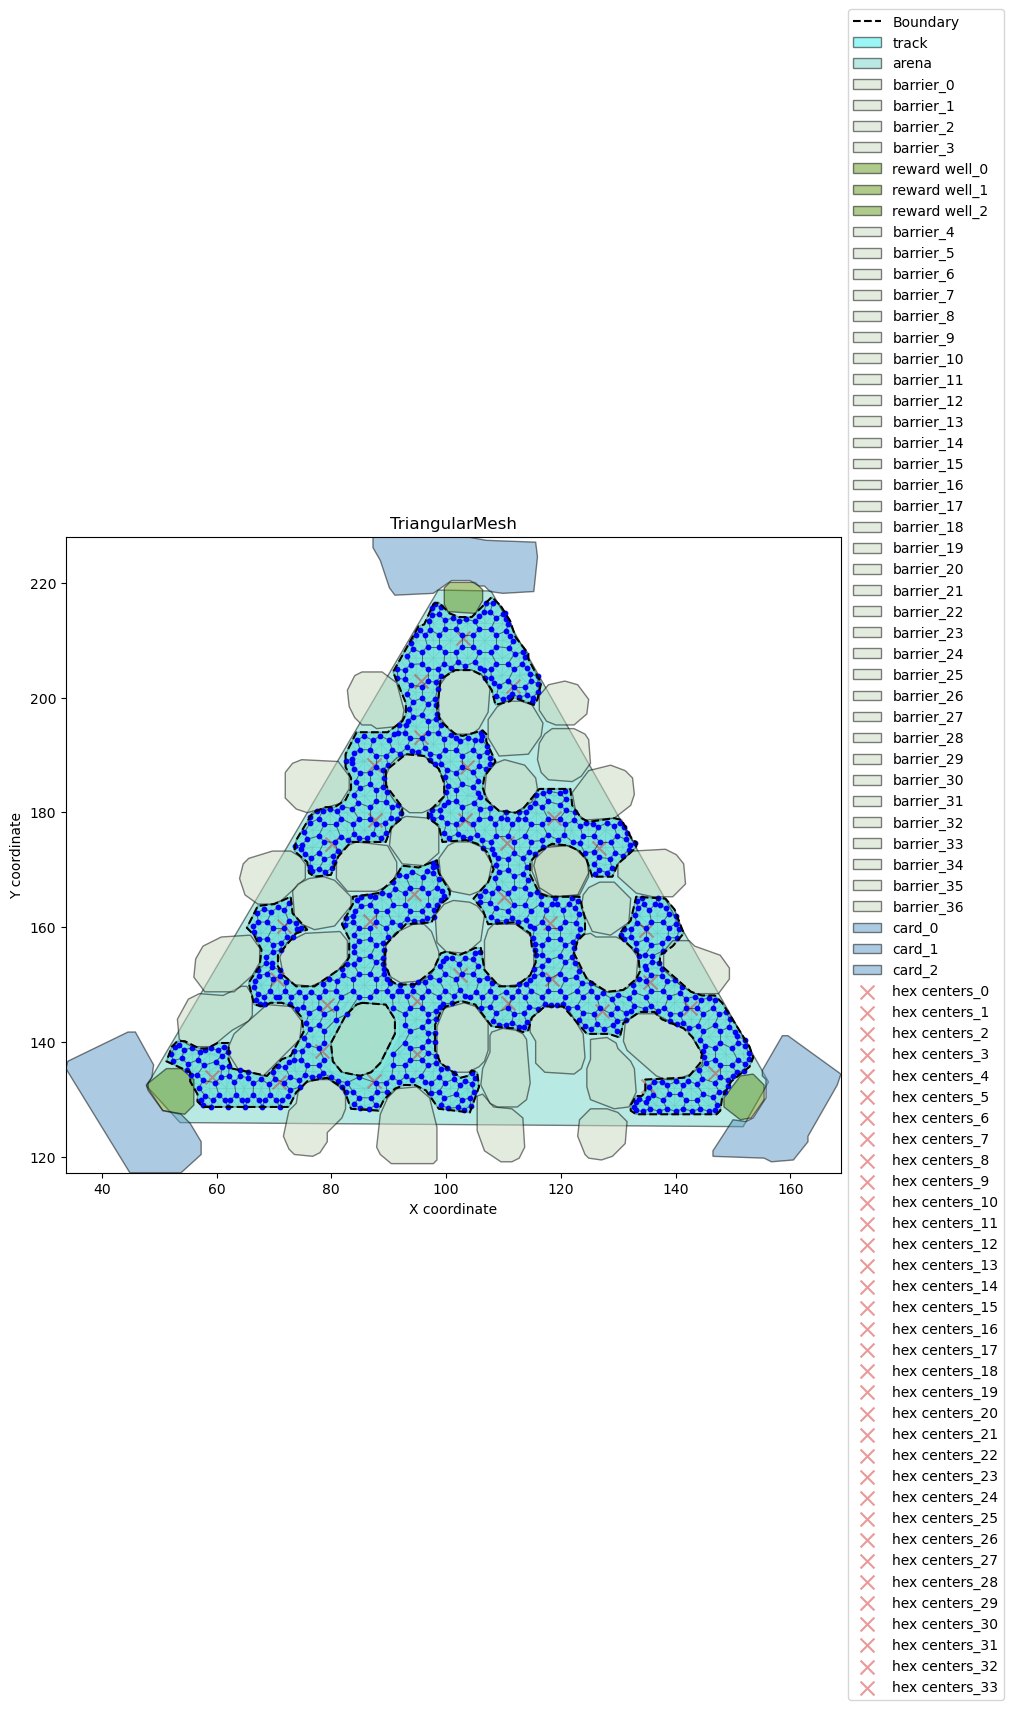

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
hex_maze_env.plot(ax=ax, show_regions=True)

In [16]:
hex_maze_env2 = Environment.from_layout(
    kind="ShapelyPolygon",
    layout_params={"polygon": boundary_polygon, "bin_size": 2.0},
    regions=hex_maze_regions,
)

<Axes: title={'center': 'ShapelyPolygon (2D Grid)'}, xlabel='Dimension 0', ylabel='Dimension 1'>

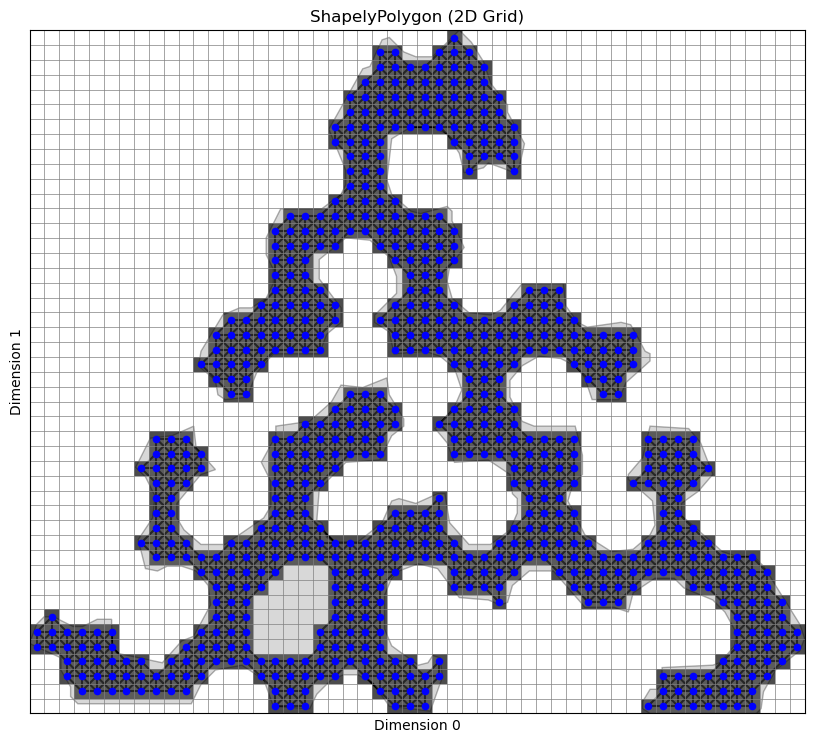

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
hex_maze_env2.plot(ax=ax)

<Axes: title={'center': 'ShapelyPolygon (2D Grid)'}, xlabel='Dimension 0', ylabel='Dimension 1'>

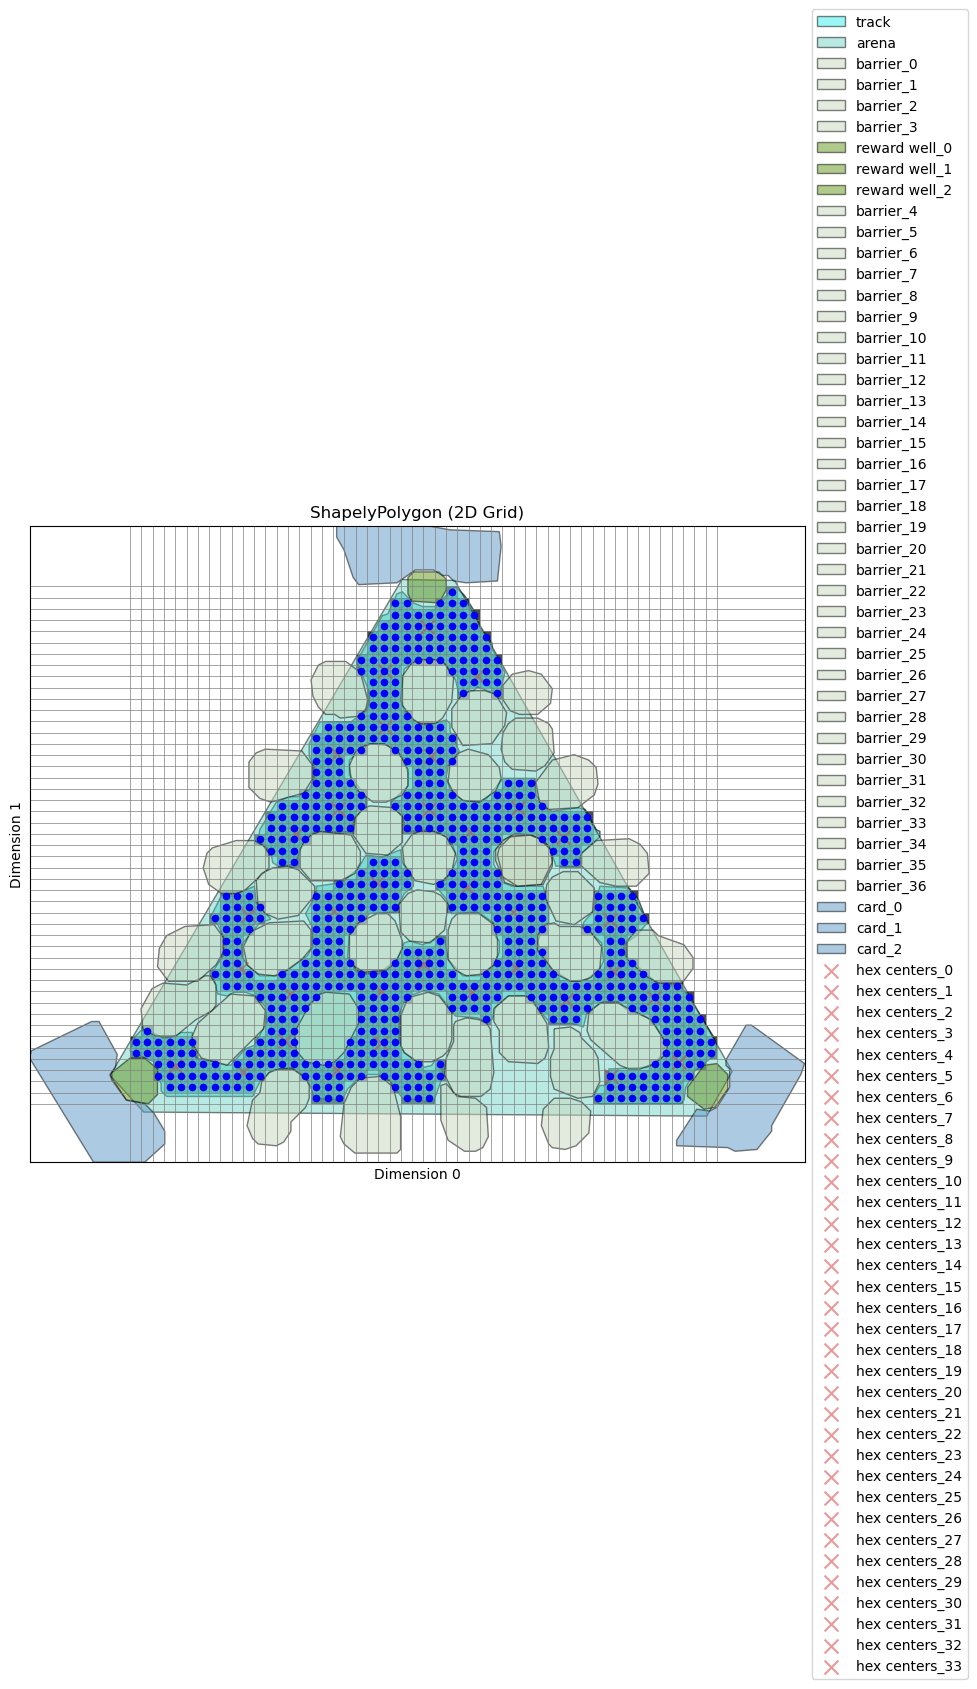

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
hex_maze_env2.plot(ax=ax, show_regions=True)

In [19]:
hex_maze_env.n_bins

987

In [20]:
hex_maze_env2.n_bins

713

In [ ]:
from typing import Any, Dict, List, Optional, Union

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon as MplPolygon
import numpy as np
from numpy.typing import NDArray
from non_local_detector.environment.layout import TriangularMeshLayout

def plot_triangular_mesh_distribution(
    layout: TriangularMeshLayout,
    data_values: NDArray[np.float64],
    ax: Optional[plt.Axes] = None,
    cmap: Union[str, mcolors.Colormap] = "viridis",
    vmin: Optional[float] = None,
    vmax: Optional[float] = None,
    show_colorbar: bool = True,
    colorbar_label: str = "Probability",
    triangle_style_kwargs: Optional[Dict[str, Any]] = None,
    boundary_kwargs: Optional[Dict[str, Any]] = None,
    show_boundary: bool = True,
) -> plt.Axes:
    """
    Plots a probability distribution (or other scalar data) over a
    TriangularMeshLayout using a colormap.

    Parameters
    ----------
    layout : TriangularMeshLayout
        An initialized and built instance of the TriangularMeshLayout.
    data_values : NDArray[np.float64], shape (n_active_triangles,)
        Scalar data associated with each active triangle (e.g., probabilities).
    ax : Optional[matplotlib.axes.Axes], optional
        Axes to plot on. If None, a new figure and axes are created.
    cmap : Union[str, matplotlib.colors.Colormap], optional
        Colormap to use for the data. Defaults to 'viridis'.
    vmin : Optional[float], optional
        Minimum data value for colormap scaling. If None, inferred from data_values.
    vmax : Optional[float], optional
        Maximum data value for colormap scaling. If None, inferred from data_values.
    show_colorbar : bool, optional
        If True, a colorbar is added to the plot. Defaults to True.
    colorbar_label : str, optional
        Label for the colorbar. Defaults to "Probability".
    triangle_style_kwargs : Optional[Dict[str, Any]], optional
        Keyword arguments for styling the triangle patches (e.g., edgecolor,
        linewidth, alpha). `facecolor` will be overridden by the colormap.
    boundary_kwargs : Optional[Dict[str, Any]], optional
        Keyword arguments for plotting the boundary polygon.
    show_boundary : bool, optional
        Whether to draw the original boundary polygon. Defaults to True.

    Returns
    -------
    matplotlib.axes.Axes
        The axes on which the distribution was plotted.

    Raises
    ------
    RuntimeError
        If the layout object is not properly built.
    ValueError
        If the length of `data_values` does not match the number of
        active triangles in the layout.
    """
    if (
        layout._full_delaunay_tri is None
        or layout._active_original_simplex_indices is None
        or layout.bin_centers is None  # Used for count of active bins
        or layout.dimension_ranges is None
    ):  # pragma: no cover
        raise RuntimeError(
            "TriangularMeshLayout is not built. Call layout.build() first."
        )

    n_active_triangles = layout.bin_centers.shape[0]
    if len(data_values) != n_active_triangles:  # pragma: no cover
        raise ValueError(
            f"Length of data_values ({len(data_values)}) must match "
            f"the number of active triangles ({n_active_triangles})."
        )

    if ax is None:
        fig, ax = plt.subplots(figsize=(7, 7))  # Default figsize
    else:
        fig = ax.get_figure()

    # Prepare triangle patches
    patches: List[MplPolygon] = []
    # Accessing potentially "private" attributes for geometry:
    mesh_points = layout._full_delaunay_tri.points
    active_simplices_vertices = mesh_points[
        layout._full_delaunay_tri.simplices[layout._active_original_simplex_indices]
    ]

    for vertices in active_simplices_vertices:
        patches.append(MplPolygon(vertices, closed=True))

    # Define default styling for triangles (edge, alpha, etc.)
    # Facecolor will be determined by data_values and cmap
    default_triangle_styles = {
        "edgecolor": "none",
        "linewidth": 0.0,
        "alpha": 1.0,
        "antialiased": False,
    }
    if triangle_style_kwargs:
        default_triangle_styles.update(triangle_style_kwargs)

    # Create PatchCollection
    patch_collection = PatchCollection(patches, **default_triangle_styles)
    patch_collection.set_array(data_values)
    patch_collection.set_cmap(cmap)

    # Set color limits
    if vmin is not None or vmax is not None:
        patch_collection.set_clim(vmin, vmax)
    elif len(data_values) > 0:  # Autoscale if not set and data exists
        patch_collection.set_clim(np.nanmin(data_values), np.nanmax(data_values))

    ax.add_collection(patch_collection)

    # Plot boundary polygon
    if show_boundary and layout._boundary_polygon_stored:
        default_boundary_styles = {
            "color": "black",
            "linewidth": 1.5,
            "linestyle": "--",
            "zorder": 4,
            "label": "Boundary",
        }
        if boundary_kwargs:
            default_boundary_styles.update(boundary_kwargs)

        xb, yb = layout._boundary_polygon_stored.exterior.xy
        ax.plot(xb, yb, **default_boundary_styles)
        for interior in layout._boundary_polygon_stored.interiors:
            xbi, ybi = interior.xy
            ax.plot(xbi, ybi, **default_boundary_styles)
        # Avoid duplicate labels if called multiple times with interiors
        handles, labels = ax.get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        ax.legend(by_label.values(), by_label.keys())

    # Set plot properties
    ax.set_aspect("equal", adjustable="box")
    ax.set_xlim(layout.dimension_ranges[0])
    ax.set_ylim(layout.dimension_ranges[1])
    ax.set_xlabel("X coordinate")
    ax.set_ylabel("Y coordinate")
    ax.set_title(f"Data Distribution over {layout._layout_type_tag}")

    # Add colorbar
    if show_colorbar:
        cbar = fig.colorbar(patch_collection, ax=ax, orientation="vertical")
        cbar.set_label(colorbar_label)

    return ax


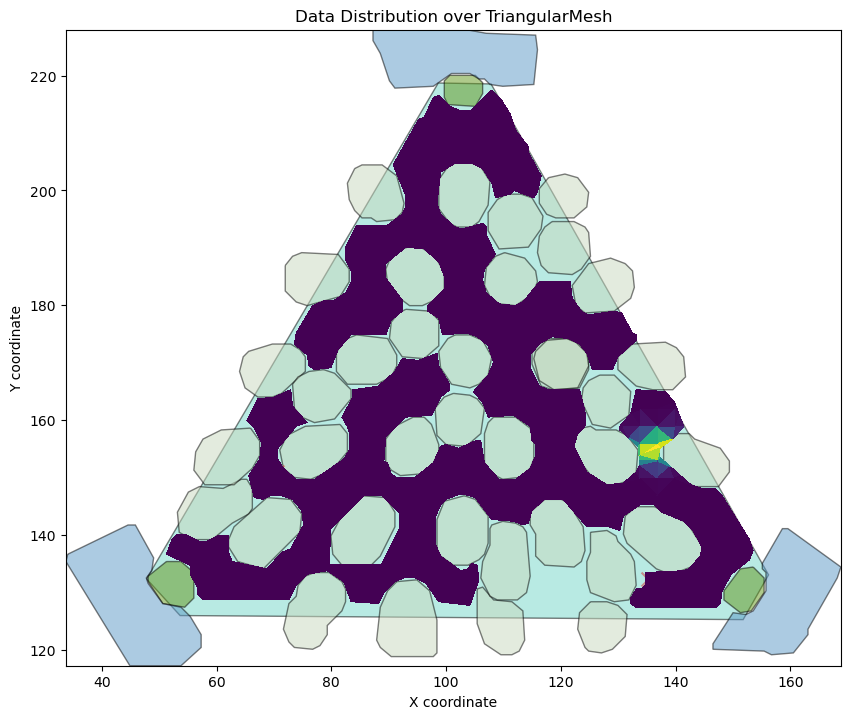

In [37]:
from non_local_detector.diffusion_kernels import compute_diffusion_kernels

kernel = compute_diffusion_kernels(
    graph=hex_maze_env.connectivity,
    bandwidth_sigma=3.0,
    bin_sizes=hex_maze_env.bin_sizes,
    mode="transition",
)


fig, ax = plt.subplots(figsize=(10, 10))
plot_triangular_mesh_distribution(
    hex_maze_env.layout,
    data_values=kernel[500],
    ax=ax,
    show_colorbar=False,
    cmap="viridis",
    show_boundary=False,
    triangle_style_kwargs={"zorder": 20},
)
plot_regions(
    hex_maze_regions,
    ax=ax,
    add_legend=False,
    region_names=[name for name in hex_maze_regions if name != "track"],
)

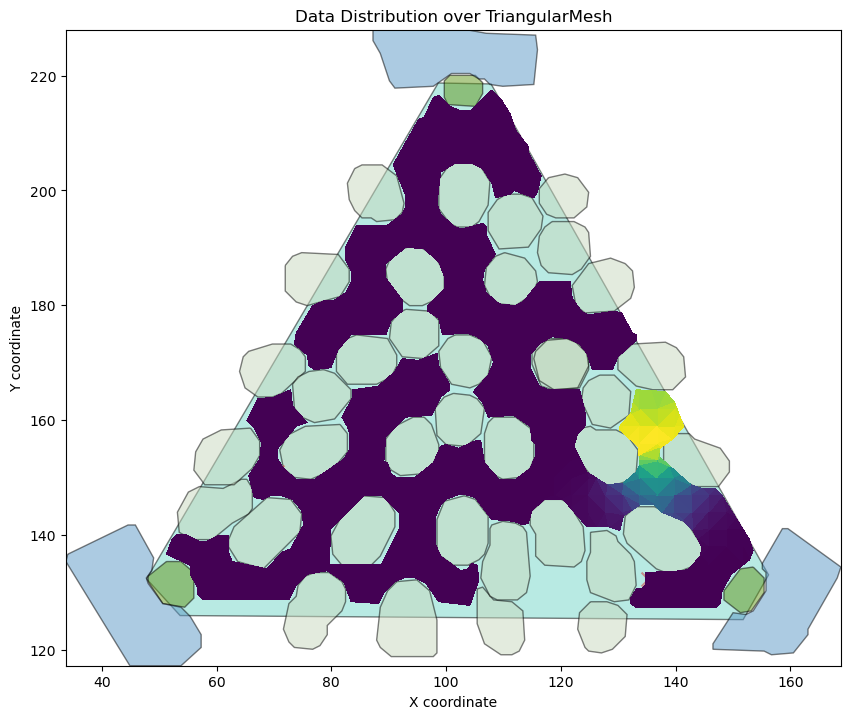

In [ ]:
kernel = compute_diffusion_kernels(
    graph=hex_maze_env.connectivity,
    bandwidth_sigma=10.0,
    bin_sizes=hex_maze_env.bin_sizes,
    mode="transition",
)


fig, ax = plt.subplots(figsize=(10, 10))
plot_triangular_mesh_distribution(
    hex_maze_env.layout,
    data_values=kernel[500],
    ax=ax,
    show_colorbar=False,
    cmap="viridis",
    show_boundary=False,
    triangle_style_kwargs={"zorder": 20},
)
plot_regions(
    hex_maze_regions,
    ax=ax,
    add_legend=False,
    region_names=[name for name in hex_maze_regions if name != "track"],
)

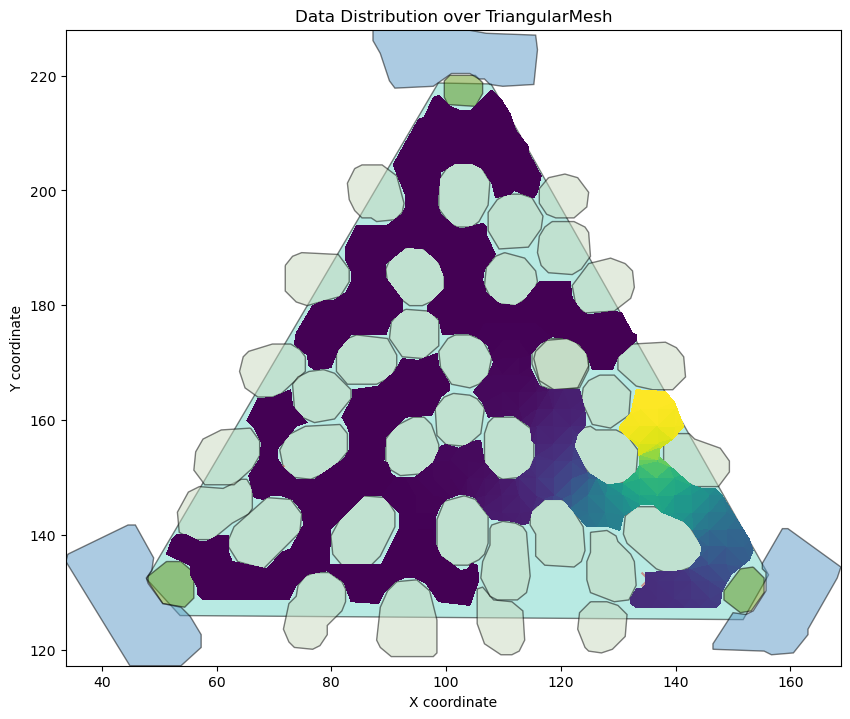

In [ ]:
kernel = compute_diffusion_kernels(
    graph=hex_maze_env.connectivity,
    bandwidth_sigma=30.0,
    bin_sizes=hex_maze_env.bin_sizes,
    mode="transition",
)


fig, ax = plt.subplots(figsize=(10, 10))
plot_triangular_mesh_distribution(
    hex_maze_env.layout,
    data_values=kernel[500],
    ax=ax,
    show_colorbar=False,
    cmap="viridis",
    show_boundary=False,
    triangle_style_kwargs={"zorder": 20},
)
plot_regions(
    hex_maze_regions,
    ax=ax,
    add_legend=False,
    region_names=[name for name in hex_maze_regions if name != "track"],
)

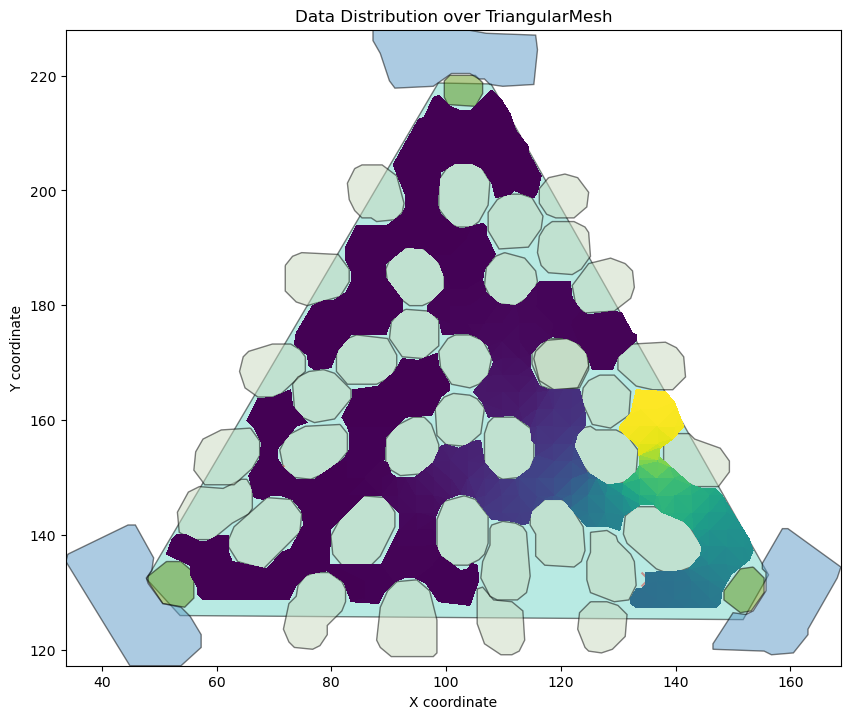

In [40]:
kernel = compute_diffusion_kernels(
    graph=hex_maze_env.connectivity,
    bandwidth_sigma=40.0,
    bin_sizes=hex_maze_env.bin_sizes,
    mode="transition",
)


fig, ax = plt.subplots(figsize=(10, 10))
plot_triangular_mesh_distribution(
    hex_maze_env.layout,
    data_values=kernel[500],
    ax=ax,
    show_colorbar=False,
    cmap="viridis",
    show_boundary=False,
    triangle_style_kwargs={"zorder": 20},
)
plot_regions(
    hex_maze_regions,
    ax=ax,
    add_legend=False,
    region_names=[name for name in hex_maze_regions if name != "track"],
)

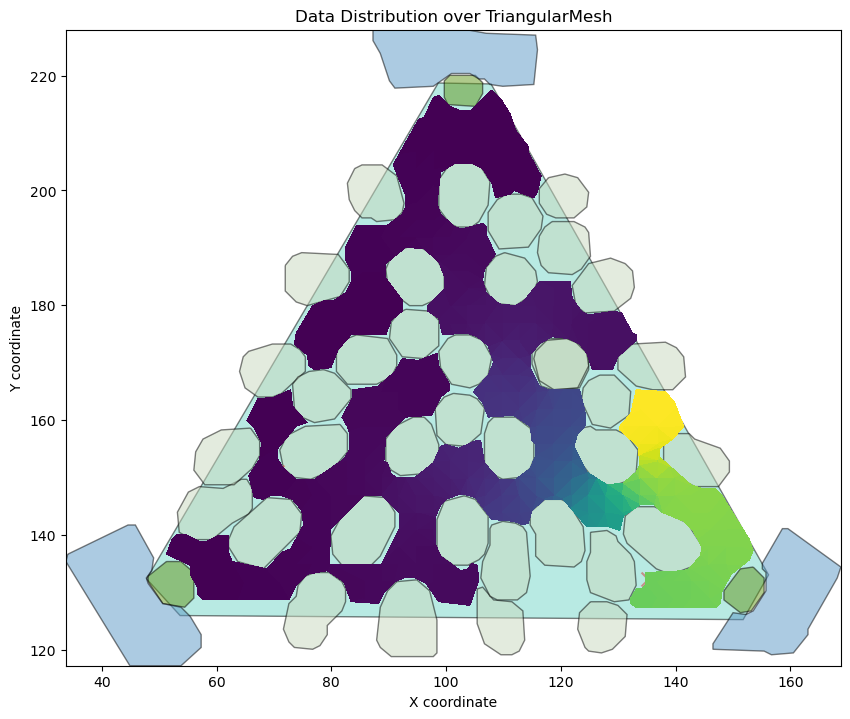

In [41]:
kernel = compute_diffusion_kernels(
    graph=hex_maze_env.connectivity,
    bandwidth_sigma=50.0,
    bin_sizes=hex_maze_env.bin_sizes,
    mode="transition",
)


fig, ax = plt.subplots(figsize=(10, 10))
plot_triangular_mesh_distribution(
    hex_maze_env.layout,
    data_values=kernel[500],
    ax=ax,
    show_colorbar=False,
    cmap="viridis",
    show_boundary=False,
    triangle_style_kwargs={"zorder": 20},
)
plot_regions(
    hex_maze_regions,
    ax=ax,
    add_legend=False,
    region_names=[name for name in hex_maze_regions if name != "track"],
)

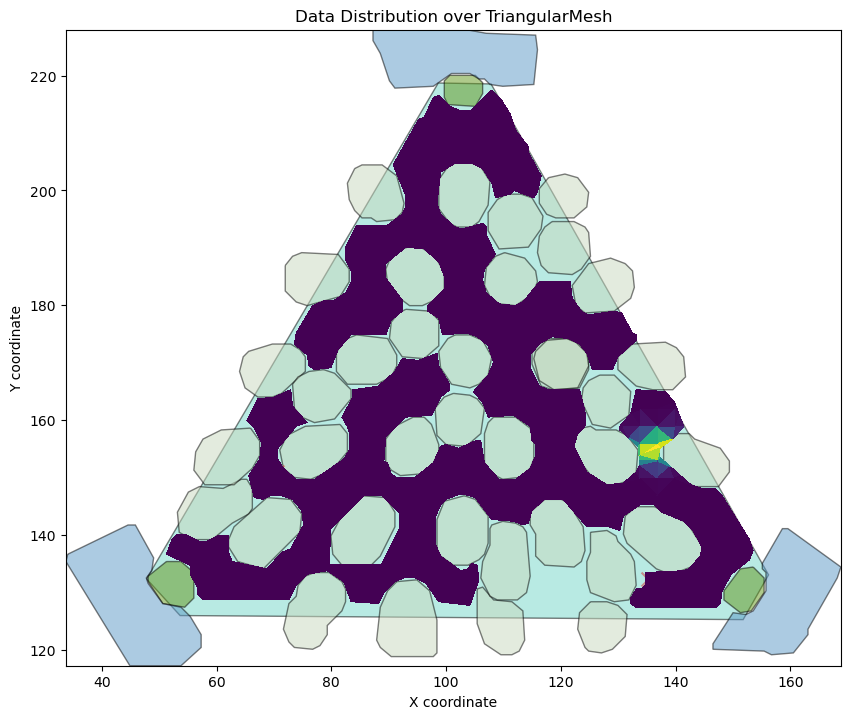

In [47]:
kernel = compute_diffusion_kernels(
    graph=hex_maze_env.connectivity,
    bandwidth_sigma=3.0,
    bin_sizes=hex_maze_env.bin_sizes,
    mode="transition",
)


fig, ax = plt.subplots(figsize=(10, 10))
plot_triangular_mesh_distribution(
    hex_maze_env.layout,
    data_values=kernel[500],
    ax=ax,
    show_colorbar=False,
    cmap="viridis",
    show_boundary=False,
    triangle_style_kwargs={"zorder": 20},
)
plot_regions(
    hex_maze_regions,
    ax=ax,
    add_legend=False,
    region_names=[name for name in hex_maze_regions if name != "track"],
)